# Assignment-8
Dataset name: Titanic: Machine Learning from Disaster [https://www.kaggle.com/c/titanic/data]

Description: Here, I have computed the analysis of what sorts of people were likely to survive in the titanic disaster. In particular I have computed: a) the total positive log-evidence, b) the total negative log-evidence, c) probability distribution, d) top 3 features values that contribute most to the positive evidence, e) top 3 feature values that contribute the most to the negative evidence; using Logistic Regression.

Reference- LR ipython book provided by Prof. Mustafa Bilgic

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy
import graphviz

# Loading Data

In [156]:
T_data = pd.read_csv("~/Downloads/Titanic-train.csv")

In [157]:
T_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [158]:
T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
T_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [160]:
del T_data['Cabin']
del T_data['PassengerId']
del T_data['Embarked']
del T_data['Name']
del T_data['Ticket']
del T_data['Fare']
del T_data['Age']

In [161]:
T_data.SibSp = T_data.SibSp.astype(str)
T_data.Pclass = T_data.Pclass.astype(str)
T_data.Parch = T_data.Parch.astype(str)

# Binarize the features

In [162]:
T_data = pd.get_dummies(T_data)

In [163]:
T_data.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [164]:
feature_names = ['Age', 'Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','SibSp_0','SibSp_1','SibSp_2','SibSp_3','SibSp_4','SibSp_5','SibSp_8','Parch_0','Parch_1','Parch_2','Parch_3','Parch_4','Parch_5','Parch_6']
feature_names

['Age',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'SibSp_0',
 'SibSp_1',
 'SibSp_2',
 'SibSp_3',
 'SibSp_4',
 'SibSp_5',
 'SibSp_8',
 'Parch_0',
 'Parch_1',
 'Parch_2',
 'Parch_3',
 'Parch_4',
 'Parch_5',
 'Parch_6']

# Create train-test split

In [165]:
X_train,X_test,Y_train,Y_test=train_test_split(T_data.drop(['Survived'],axis=1),T_data['Survived'],train_size=0.67,test_size=0.33,random_state=42)

In [166]:
X_test.reset_index(inplace=True)
del X_test['index']

In [167]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(fit_intercept=False, penalty='l2', C=1)
LR.fit(X_train, Y_train)

top_10_sorted = np.argsort(np.abs(LR.coef_[0]))[::-1]

counter =0 
for i in top_10_sorted:
    print("%s\t\t%0.3f" %(X_train.columns[i], LR.coef_[0][i]))
    counter=counter+1
    if counter >9:
        break 

Sex_male		-1.593
Pclass_3		-1.109
SibSp_8		-0.927
Sex_female		0.926
Parch_4		-0.881
Parch_5		-0.797
Parch_1		0.725
SibSp_3		-0.632
Parch_3		0.563
SibSp_5		-0.526


In [168]:
LR = LogisticRegression(fit_intercept=False, penalty='l1', C=1)
LR.fit(X_train, Y_train)

top_10_sorted = np.argsort(np.abs(LR.coef_[0]))[::-1]
counter =0 
for i in top_10_sorted:
    print("%s\t\t%0.3f" %(X_train.columns[i], LR.coef_[0][i]))
    counter=counter+1
    if counter >9:
        break 

Sex_male		-1.293
Sex_female		1.231
Pclass_3		-1.141
SibSp_8		-0.981
Parch_4		-0.722
SibSp_3		-0.657
Parch_1		0.649
Parch_5		-0.453
Pclass_1		0.409
SibSp_0		0.281


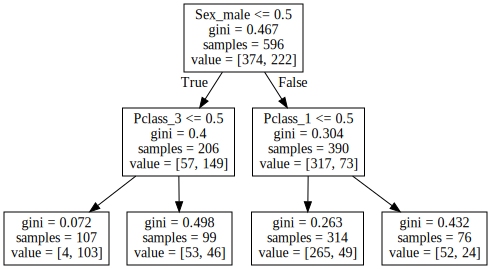

In [169]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT = tree.DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
DT.fit(X_train,Y_train)
from graphviz import Source
from IPython.display import SVG
graph = Source( tree.export_graphviz(DT, out_file=None, feature_names=X_train.columns))
SVG(graph.pipe(format='svg'))

# Results

-It's evident from above that for L2-regularized Logistic Regression, L1-regularized Logistic Regression and Decision Tree Classifier, Sex_male proves to be the most important feature for splitting the tree and also magnitude wise.
-Here, L2-regularization takes sum of squares of weight whilw L1-regularization takes just sum of weights. Aslo, with L2, it tends to shrink the highest weight and with L1, it tries to reduce the weight value towards 0

# Z-scoring the features

In [170]:
scaler = StandardScaler()
Xtr = scaler.fit_transform(X_train)
Xtr

array([[ 1.84792176, -0.51516287, -1.13679712, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ],
       [-0.54114845, -0.51516287,  0.87966444, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ],
       [-0.54114845,  1.94113369, -1.13679712, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ],
       ..., 
       [-0.54114845, -0.51516287,  0.87966444, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ],
       [ 1.84792176, -0.51516287, -1.13679712, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ],
       [ 1.84792176, -0.51516287, -1.13679712, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ]])

In [171]:
Xte = scaler.transform(X_test)
Xte

array([[-0.54114845, -0.51516287,  0.87966444, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ],
       [-0.54114845,  1.94113369, -1.13679712, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ],
       [-0.54114845, -0.51516287,  0.87966444, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ],
       ..., 
       [-0.54114845, -0.51516287,  0.87966444, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ],
       [-0.54114845, -0.51516287,  0.87966444, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ],
       [-0.54114845, -0.51516287,  0.87966444, ..., -0.0711268 ,
        -0.0711268 , -0.040996  ]])

In [172]:
LR = LogisticRegression(fit_intercept=False, penalty='l2', C=1)
LR.fit(Xtr, Y_train)

top_10_sorted = np.argsort(np.abs(LR.coef_[0]))[::-1]
counter =0 
for i in top_10_sorted:
     print("%s\t\t%0.3f" %(X_train.columns[i], LR.coef_[0][i]))
     counter=counter+1
     if counter >9:
        break 

Parch_3		3.118
Sex_male		-0.622
Sex_female		0.622
Pclass_3		-0.350
Parch_0		-0.330
Pclass_1		0.317
SibSp_8		-0.295
Parch_4		-0.275
Parch_5		-0.267
SibSp_3		-0.206


In [173]:
LR = LogisticRegression(fit_intercept=False, penalty='l1', C=1)
LR.fit(Xtr, Y_train)

top_10_sorted = np.argsort(np.abs(LR.coef_[0]))[::-1]
counter =0 
for i in top_10_sorted:
    print("%s\t\t%0.3f" %(X_train.columns[i], LR.coef_[0][i]))
    counter=counter+1
    if counter >9:
        break 

Parch_3		7.831
Sex_female		1.046
Pclass_3		-0.500
SibSp_8		-0.347
Parch_4		-0.253
Parch_5		-0.244
SibSp_5		-0.229
Pclass_1		0.201
SibSp_3		-0.201
Sex_male		-0.176


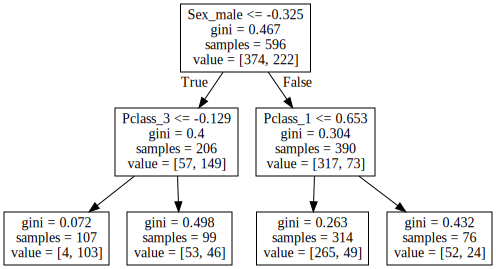

In [174]:
DT = tree.DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.005)
DT.fit(Xtr,Y_train)
from graphviz import Source
from IPython.display import SVG
graph = Source( tree.export_graphviz(DT, out_file=None, feature_names=X_train.columns))
SVG(graph.pipe(format='svg'))

# Results

-It's evident from above that after using scaled-data for L2-regularized Logistic Regression and L1-regularized Logistic Regression, Parch_3 seem to be the most weighted feature and for Decision Tree Classifier, Sex_male proves to be the most important feature for splitting the tree
-Here, L2-regularization takes sum of squares of weight whilw L1-regularization takes just sum of weights. Aslo, with L2, it tends to shrink the highest weight and with L1, it tries to reduce the weight value towards 0

In [175]:
LR = LogisticRegression(fit_intercept=False, penalty='l2', C=1)
LR.fit(Xtr, Y_train)

prob_val=LR.predict(Xte)
pre_proba=LR.predict_proba(Xte)
pre_proba

array([[ 0.7202365 ,  0.2797635 ],
       [ 0.66297529,  0.33702471],
       [ 0.83645956,  0.16354044],
       [ 0.06324503,  0.93675497],
       [ 0.28696498,  0.71303502],
       [ 0.07980058,  0.92019942],
       [ 0.27253909,  0.72746091],
       [ 0.86654326,  0.13345674],
       [ 0.27253909,  0.72746091],
       [ 0.0567255 ,  0.9432745 ],
       [ 0.55982313,  0.44017687],
       [ 0.83645956,  0.16354044],
       [ 0.50785178,  0.49214822],
       [ 0.83645956,  0.16354044],
       [ 0.66297529,  0.33702471],
       [ 0.03904734,  0.96095266],
       [ 0.55982313,  0.44017687],
       [ 0.27253909,  0.72746091],
       [ 0.66297529,  0.33702471],
       [ 0.54210913,  0.45789087],
       [ 0.83645956,  0.16354044],
       [ 0.54210913,  0.45789087],
       [ 0.28696498,  0.71303502],
       [ 0.83645956,  0.16354044],
       [ 0.83645956,  0.16354044],
       [ 0.95423204,  0.04576796],
       [ 0.54210913,  0.45789087],
       [ 0.66297529,  0.33702471],
       [ 0.95423204,